In [143]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from modules import *
from numpy.linalg import LinAlgError
import os
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [ ]:
def calculate_wap(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    df_copy['WAP'] = (df_copy['bid_price1']*df_copy['ask_size1'] + df_copy['ask_price1']*df_copy['bid_size1']) /\
    (df_copy['bid_size1'] + df_copy['ask_size1'])
    return df_copy

def calculate_volatility(wap_data: np.array):
    log_returns = np.log(wap_data[1:] / wap_data[:-1]) 
    squared_returns = log_returns ** 2
    volatility = np.sqrt(np.sum(squared_returns))
    return volatility


In [37]:
rmspe_results = []

linalg_error_info = []

#stock 14, all time ids, estimate 60s, model = 1,1,2
df = pd.read_csv('/Users/mia/Desktop/usyd/data3888/individual_book_train copy/stock_14.csv')
df['WAP'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1']) /\
    (df['bid_size1'] + df['ask_size1'])
for time_id in tqdm(df['time_id'].unique()):
    try:
        df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
        df_train = df_filtered[df_filtered['seconds_in_bucket'] < 540]
        df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 540]
        model = ARIMA(df_train['WAP'], order=(1, 1, 2))
        model_fit = model.fit()

        forecast_test = model_fit.forecast(60)
        df_forecast = np.array(forecast_test)

        actual_volatility = calculate_volatility(np.array(df_test['WAP']))
        forecast_volatility = calculate_volatility(np.array(df_forecast))

        rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
        rmspe_results.append(rmspe)
    except LinAlgError:
        linalg_error_info.append((time_id))


100%|██████████| 3830/3830 [16:54<00:00,  3.77it/s]   


In [38]:
rmspe_results

[0.9977062914537302,
 0.9631034878936299,
 0.9999999999994662,
 0.9998449109921372,
 0.9964838358714339,
 0.9983411052247607,
 0.9846403423978204,
 1.0,
 0.9942262009665961,
 0.9998213910783079,
 0.996103263044879,
 0.9967421695379669,
 0.9970339826352832,
 0.9987496739812571,
 0.9836842767431866,
 0.9928032640739823,
 0.999348134956183,
 0.9988848262454867,
 0.9914719531268315,
 0.9957585281235831,
 0.9980181326098575,
 0.9966341281940794,
 1.0,
 0.9945207188748459,
 1.0,
 0.9924020708806177,
 1.0,
 0.9778821550268503,
 0.9990884312890924,
 0.9975776937734745,
 0.9974919040070338,
 0.9998718736848122,
 0.9974075194798548,
 0.9999999987234418,
 0.9921284935854464,
 0.9973695895026444,
 0.9951148063682214,
 0.9953035229773295,
 0.993969470925603,
 0.9989012516547409,
 0.9999999999970377,
 1.0,
 0.9966337391687791,
 0.9975592876677463,
 0.9992509414824842,
 0.9979161858079441,
 0.9998093151898415,
 0.991953986758847,
 0.9964412946418469,
 0.999115399216128,
 0.999604881822809,
 0.9974839

In [39]:
np.array(rmspe_results).mean()

0.992732135727037

In [40]:
rmspe_results = []

linalg_error_info = []

#all stocks, estimate 60s, model = 1,1,2
folder_path = "/Users/mia/Desktop/usyd/data3888/individual_book_train"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_id = filename.split("_")[1].split(".")[0]
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df = calculate_wap(df)
        for time_id in tqdm(df['time_id'].unique(), desc=f"Processing {filename}"):
            try:
                df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
                df_train = df_filtered[df_filtered['seconds_in_bucket'] < 540]
                df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 540]
                model = ARIMA(df_train['WAP'], order=(1, 1, 2))
                model_fit = model.fit()

                forecast_test = model_fit.forecast(60)
                df_forecast = np.array(forecast_test)

                actual_volatility = calculate_volatility(np.array(df_test['WAP']))
                forecast_volatility = calculate_volatility(np.array(df_forecast))

                rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
                rmspe_results.append(rmspe)
            except LinAlgError:
                linalg_error_info.append((stock_id, time_id))

Processing stock_36.csv: 100%|██████████| 3830/3830 [04:40<00:00, 13.63it/s]


In [46]:
np.array(rmspe_results).mean()

rmspe_results

[0.99147070430982,
 0.9847809242745037,
 0.9993499380400026,
 0.9880158117005463,
 0.9703278456518616,
 1.0,
 0.9982256949535778,
 0.9586405828253038,
 0.9978334371943678,
 0.9998321257779785,
 0.9819537517728512,
 0.9983834533733633,
 0.9952232700921001,
 0.9985804993463706,
 0.999869599874064,
 0.9998562056269901,
 0.9991508230274994,
 0.9988790567116013,
 0.9832536321656165,
 0.996796881155216,
 0.9992573895018749,
 0.9951693616577659,
 0.9981503750865189,
 0.9945164765906717,
 0.9706114010245033,
 0.9882916222821879,
 0.9889610819662761,
 0.9980244316198306,
 0.9994702108103962,
 0.9959084787351306,
 0.998999905650518,
 0.9992902564278734,
 0.9914144327837886,
 1.0,
 1.0,
 1.0,
 0.9858059007323801,
 0.9472913908564743,
 0.9998010879171141,
 0.9999944571526346,
 0.9837946777827452,
 0.9987035146517595,
 0.9996778710815487,
 0.9750401597758356,
 0.999317429229662,
 0.9994572093914276,
 0.9956938886899199,
 0.9992884756492576,
 0.9813121644795579,
 0.9999694152009373,
 0.9871417239276

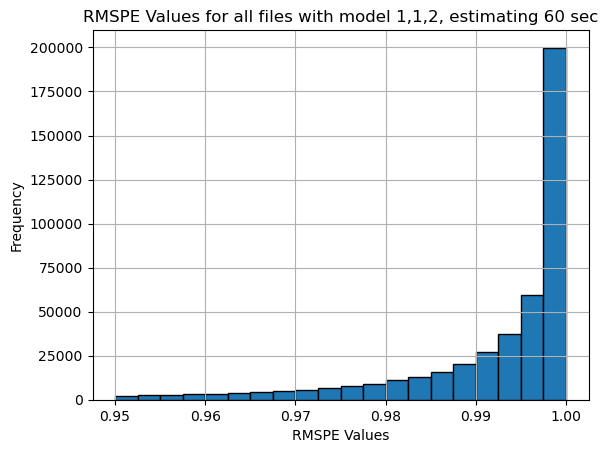

In [63]:
rmspe_array = np.array(rmspe_results)
filtered_rmspe = rmspe_array[~np.isnan(rmspe_array) & ~np.isinf(rmspe_array)]

plt.hist(filtered_rmspe, bins=20, edgecolor='black', range=(0.95, 1))
plt.xlabel('RMSPE Values')
plt.ylabel('Frequency')
plt.title('RMSPE Values for all files with model 1,1,2, estimating 60 sec')
plt.grid(True)
plt.show()

In [66]:
rmspe_results_216_copy_10 = []

linalg_error_info = []
#stock 1-10, estimate 10s, model = 2,1,6
folder_path = "/Users/mia/Desktop/usyd/data3888/individual_book_train copy"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_id = filename.split("_")[1].split(".")[0]
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df = calculate_wap(df)
        for time_id in tqdm(df['time_id'].unique(), desc=f"Processing {filename}"):
            try:
                df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
                df_train = df_filtered[df_filtered['seconds_in_bucket'] < 590]
                df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 590]
                model = ARIMA(df_train['WAP'], order=(2, 1, 6))
                model_fit = model.fit()

                forecast_test = model_fit.forecast(10)
                df_forecast = np.array(forecast_test)

                actual_volatility = calculate_volatility(np.array(df_test['WAP']))
                forecast_volatility = calculate_volatility(np.array(df_forecast))

                rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
                rmspe_results_216_copy_10.append(rmspe)
            except LinAlgError:
                linalg_error_info.append((stock_id, time_id))

Processing stock_5.csv: 100%|██████████| 3830/3830 [16:09<00:00,  3.95it/s]


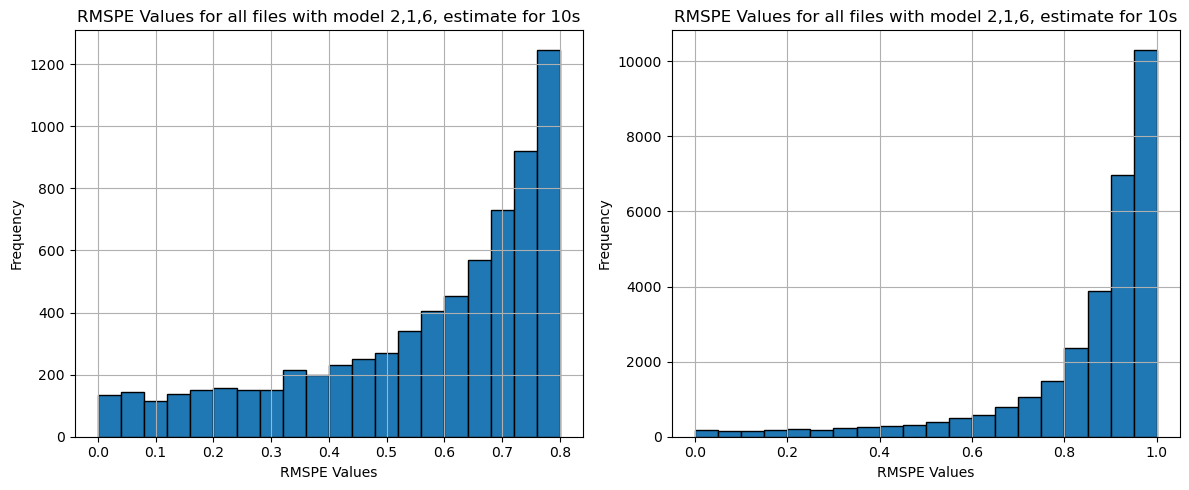

In [91]:
rmspe_array_216_copy_10 = np.array(rmspe_results_216_copy_10)
filtered_rmspe_216_copy_10 = rmspe_array_216_copy_10[~np.isnan(rmspe_array_216_copy_10) & ~np.isinf(rmspe_array_216_copy_10)]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(filtered_rmspe_216_copy_10, bins=20, edgecolor='black', range=(0, 0.8))
axs[0].set_xlabel('RMSPE Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('RMSPE Values for all files with model 2,1,6, estimate for 10s')
axs[0].grid(True)

axs[1].hist(filtered_rmspe_216_copy_10, bins=20, edgecolor='black', range=(0,1)) 
axs[1].set_xlabel('RMSPE Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('RMSPE Values for all files with model 2,1,6, estimate for 10s')
axs[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
rmspe_results_112_all_10 = []

linalg_error_info = []
#all stocks, estimate 10s, model 1,1,2
folder_path = "/Users/mia/Desktop/usyd/data3888/individual_book_train"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_id = filename.split("_")[1].split(".")[0]
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df = calculate_wap(df)
        for time_id in tqdm(df['time_id'].unique(), desc=f"Processing {filename}"):
            try:
                df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
                df_train = df_filtered[df_filtered['seconds_in_bucket'] < 590]
                df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 590]
                model = ARIMA(df_train['WAP'], order=(1, 1, 2))
                model_fit = model.fit()

                forecast_test = model_fit.forecast(10)
                df_forecast = np.array(forecast_test)

                actual_volatility = calculate_volatility(np.array(df_test['WAP']))
                forecast_volatility = calculate_volatility(np.array(df_forecast))

                rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
                rmspe_results_112_all_10.append(rmspe)
            except LinAlgError:
                linalg_error_info.append((stock_id, time_id))

Processing stock_36.csv: 100%|██████████| 3830/3830 [05:04<00:00, 12.60it/s]


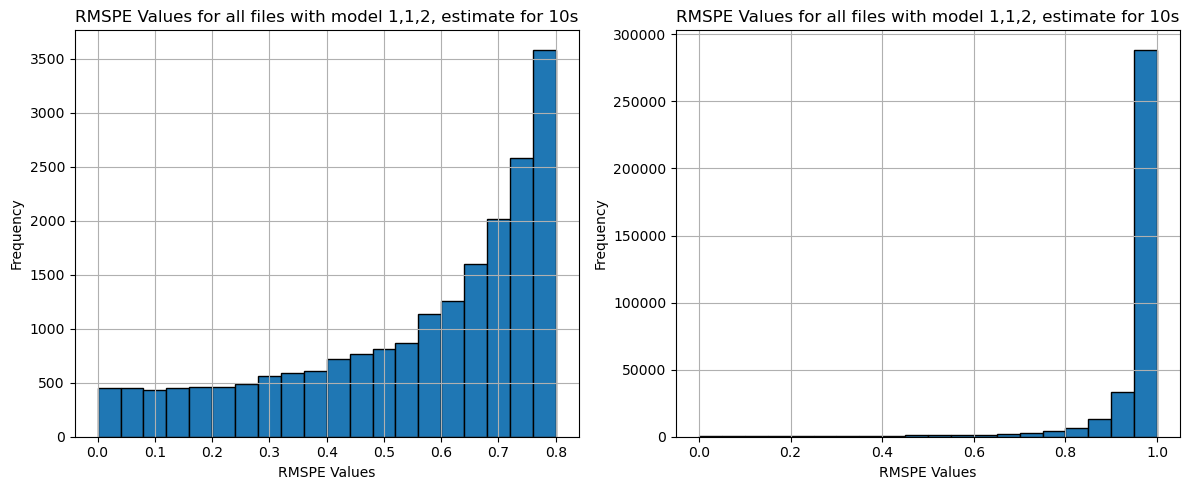

In [78]:
rmspe_array_112_all_10 = np.array(rmspe_results_112_all_10)
filtered_rmspe_112_all_10 = rmspe_array_112_all_10[~np.isnan(rmspe_array_112_all_10) & ~np.isinf(rmspe_array_112_all_10)]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(filtered_rmspe_112_all_10, bins=20, edgecolor='black', range=(0, 0.8))
axs[0].set_xlabel('RMSPE Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('RMSPE Values for all files with model 1,1,2, estimate for 10s')
axs[0].grid(True)

axs[1].hist(filtered_rmspe_112_all_10, bins=20, edgecolor='black', range=(0,1)) 
axs[1].set_xlabel('RMSPE Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('RMSPE Values for all files with model 1,1,2, estimate for 10s')
axs[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
rmspe_results_121_all_10 = []

linalg_error_info = []
#all stocks, estimate 10s, model 1,2,1
folder_path = "/Users/mia/Desktop/usyd/data3888/individual_book_train"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_id = filename.split("_")[1].split(".")[0]
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df = calculate_wap(df)
        for time_id in tqdm(df['time_id'].unique(), desc=f"Processing {filename}"):
            try:
                df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
                df_train = df_filtered[df_filtered['seconds_in_bucket'] < 590]
                df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 590]
                model = ARIMA(df_train['WAP'], order=(1, 2, 1))
                model_fit = model.fit()

                forecast_test = model_fit.forecast(10)
                df_forecast = np.array(forecast_test)

                actual_volatility = calculate_volatility(np.array(df_test['WAP']))
                forecast_volatility = calculate_volatility(np.array(df_forecast))

                rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
                rmspe_results_121_all_10.append(rmspe)
            except LinAlgError:
                linalg_error_info.append((stock_id, time_id))

Processing stock_36.csv: 100%|██████████| 3830/3830 [05:26<00:00, 11.75it/s]


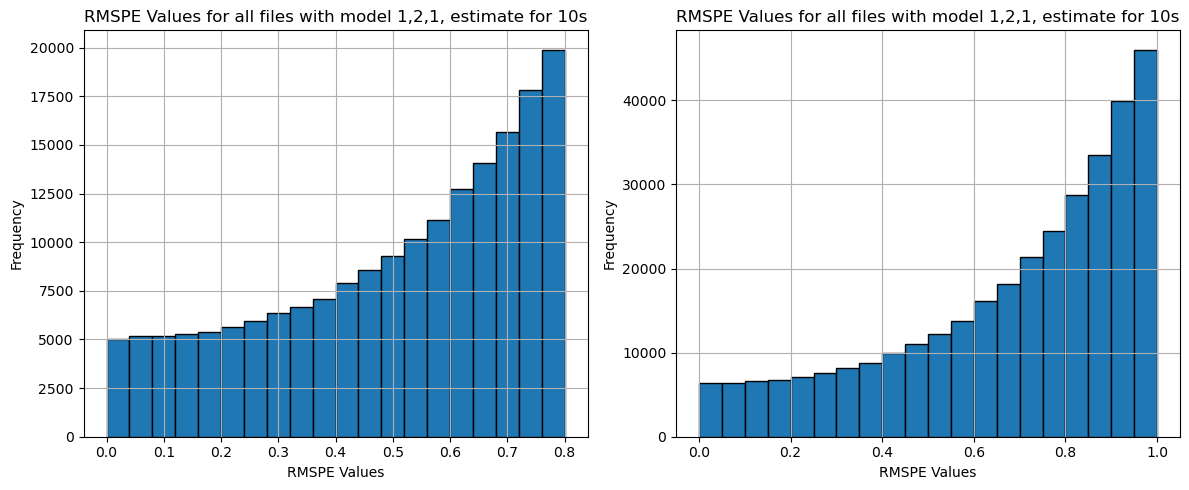

In [84]:
rmspe_array_121_all_10 = np.array(rmspe_results_121_all_10)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(rmspe_array_121_all_10, bins=20, edgecolor='black', range=(0, 0.8))
axs[0].set_xlabel('RMSPE Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('RMSPE Values for all files with model 1,2,1, estimate for 10s')
axs[0].grid(True)

axs[1].hist(rmspe_array_121_all_10, bins=20, edgecolor='black', range=(0,1)) 
axs[1].set_xlabel('RMSPE Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('RMSPE Values for all files with model 1,2,1, estimate for 10s')
axs[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
rmspe_results_120_all_10 = []

linalg_error_info = []
#all stocks, estimate 10s, model 1,2,2
folder_path = "/Users/mia/Desktop/usyd/data3888/individual_book_train"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_id = filename.split("_")[1].split(".")[0]
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df = calculate_wap(df)
        for time_id in tqdm(df['time_id'].unique(), desc=f"Processing {filename}"):
            try:
                df_filtered = df[df['time_id'] == time_id][['WAP','seconds_in_bucket']]
                df_train = df_filtered[df_filtered['seconds_in_bucket'] < 590]
                df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 590]
                model = ARIMA(df_train['WAP'], order=(1, 2, 0))
                model_fit = model.fit()

                forecast_test = model_fit.forecast(10)
                df_forecast = np.array(forecast_test)

                actual_volatility = calculate_volatility(np.array(df_test['WAP']))
                forecast_volatility = calculate_volatility(np.array(df_forecast))

                rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
                rmspe_results_120_all_10.append(rmspe)
            except LinAlgError:
                linalg_error_info.append((stock_id, time_id))

Processing stock_36.csv: 100%|██████████| 3830/3830 [03:02<00:00, 20.95it/s]


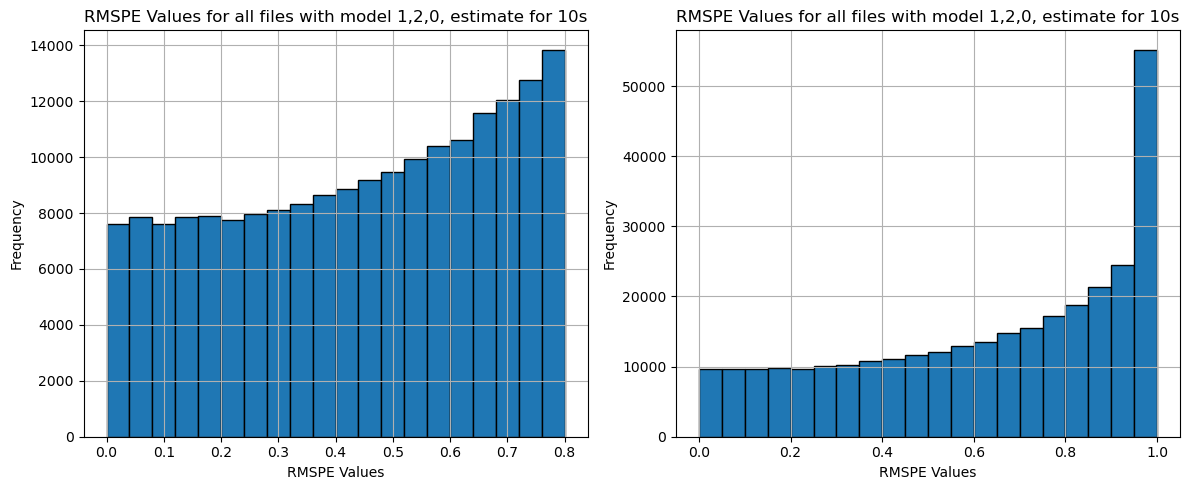

In [ ]:
rmspe_array_120_all_10 = np.array(rmspe_results_120_all_10)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(rmspe_array_120_all_10, bins=20, edgecolor='black', range=(0, 0.8))
axs[0].set_xlabel('RMSPE Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('RMSPE Values for all files with model 1,2,0, estimate for 10s')
axs[0].grid(True)

axs[1].hist(rmspe_array_120_all_10, bins=20, edgecolor='black', range=(0,1)) 
axs[1].set_xlabel('RMSPE Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('RMSPE Values for all files with model 1,2,0, estimate for 10s')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [92]:
def try_arima_model(df_train, df_test, order):
    try:
        model = ARIMA(df_train['WAP'], order=order)
        model_fit = model.fit()

        forecast_test = model_fit.forecast(10)
        df_forecast = np.array(forecast_test)

        actual_volatility = calculate_volatility(np.array(df_test['WAP']))
        forecast_volatility = calculate_volatility(np.array(df_forecast))

        rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
        rmspe_results.append(rmspe)
    except LinAlgError:
        linalg_error_info.append(order)

In [100]:
df = pd.read_csv('individual_book_train/stock_20.csv')
df['WAP'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1']) /\
    (df['bid_size1'] + df['ask_size1'])

import itertools

orders = list(itertools.product([1, 2], repeat=3))

smallest_rmspe = {}

# Iterate over time_ids
for time_id in tqdm(df['time_id'].unique()):
    df_filtered = df[df['time_id'] == time_id][['WAP', 'seconds_in_bucket']]
    df_train = df_filtered[df_filtered['seconds_in_bucket'] < 590]
    df_test = df_filtered[df_filtered['seconds_in_bucket'] >= 590]
    
    min_rmspe = float('inf')
    
    for order in orders:
        try:
            model = ARIMA(df_train['WAP'], order=order)
            model_fit = model.fit()

            forecast_test = model_fit.forecast(10)
            df_forecast = np.array(forecast_test)

            actual_volatility = calculate_volatility(np.array(df_test['WAP']))
            forecast_volatility = calculate_volatility(np.array(df_forecast))

            rmspe = np.mean(np.abs(actual_volatility - forecast_volatility) / actual_volatility)
            
            if rmspe < min_rmspe:
                min_rmspe = rmspe
                best_order = order

        except LinAlgError:
            pass

    smallest_rmspe[time_id] = {'rmspe': min_rmspe, 'order': best_order}


100%|██████████| 3830/3830 [51:53<00:00,  1.23it/s]  


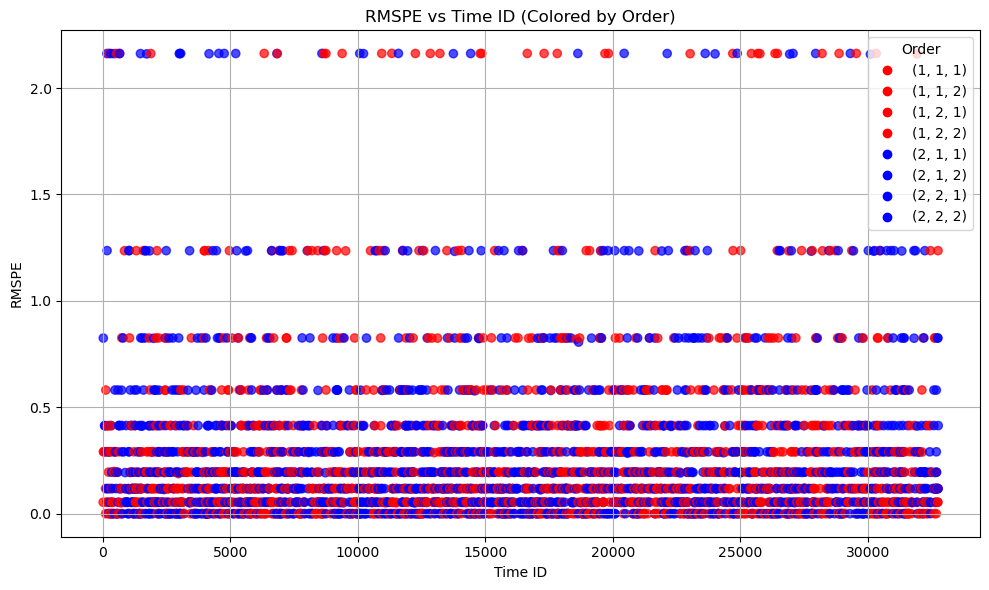

In [115]:
filtered_data = {k: {'rmspe': 0 if v['rmspe'] == float('inf') else v['rmspe'], 'order': v['order']} for k, v in smallest_rmspe.items()}

rmspe_values = [v['rmspe'] for v in filtered_data.values()]
orders = [v['order'] for v in filtered_data.values()]
time_ids = list(filtered_data.keys())

order_colors = {
    (1, 1, 1): 'red',
    (1, 1, 2): 'red',
    (1, 2, 1): 'red',
    (1, 2, 2): 'red',
    (2, 1, 1): 'blue',
    (2, 1, 2): 'blue',
    (2, 2, 1): 'blue',
    (2, 2, 2): 'blue'
}
colors = [order_colors[order] for order in orders]

plt.figure(figsize=(10, 6))
plt.scatter(time_ids, rmspe_values, c=colors, label='rmspe', alpha=0.7)
plt.xlabel('Time ID')
plt.ylabel('RMSPE')
plt.title('RMSPE vs Time ID (Colored by Order)')
plt.legend()

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=str(order), linestyle='') for order, color in order_colors.items()]
plt.legend(handles=legend_elements, title='Order')

plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
greater1 = sum(1 for rmspe in rmspe_values if rmspe > 1) / sum(1 for rmspe in rmspe_values) *100
greater1 = round(greater1, 2)

greater05 = sum(1 for rmspe in rmspe_values if rmspe > 0.5) / sum(1 for rmspe in rmspe_values) *100
greater05 = round(greater05, 2)

greater02 = sum(1 for rmspe in rmspe_values if rmspe > 0.2) / sum(1 for rmspe in rmspe_values) *100
greater02 = round(greater02, 2)

equal0 = sum(1 for rmspe in rmspe_values if rmspe == 0) / sum(1 for rmspe in rmspe_values) *100
equal0 = round(equal0, 2)

print("Number of RMSPE values greater than 1:",greater1,'%')
print("Number of RMSPE values greater than 0.5:",greater05,'%')
print("Number of RMSPE values greater than 0.2:",greater02,'%')
print("Number of RMSPE values is inf:",equal0,'%')


Number of RMSPE values greater than 1: 4.73 %
Number of RMSPE values greater than 0.5: 15.33 %
Number of RMSPE values greater than 0.2: 35.9 %
Number of RMSPE values is inf: 0.78 %


In [148]:
order1 = sum(1 for order in orders if order[0] == 1)
order2 = sum(1 for order in orders if order[0] == 2)


print("Number of time IDs that use an order starting with 1:", order1)
print("Number of time IDs that use an order starting with 2:", order2)

print("Ratio: {:.2f}:{:.2f}".format(order1/order2, order2/order2))

Number of time IDs that use an order starting with 1: 1789
Number of time IDs that use an order starting with 2: 2041
Ratio: 0.88:1.00
